# Import

In [335]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from general import GeneralUtil as util
import matplotlib.pyplot as plt

pd.options.plotting.backend = 'plotly'

# Data

In [336]:
fifa_df = pd.read_csv('../data/international_matches.csv', parse_dates=['date'])
fifa_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [338]:
fifa_df['tournament'].mode()

0    Friendly
Name: tournament, dtype: object

# EDA

### Tournament Frequency

In [339]:
top_tournament_frequency = fifa_df['tournament'].value_counts(normalize=True)[:10].reset_index().rename(columns={'index': 'tournament', 'tournament': 'frequency'})
fig = px.bar(top_tournament_frequency, x='tournament', y='frequency', color='tournament', title='Tournament Frequency', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(hovermode="x unified", xaxis={'categoryorder':'total descending'})
fig.update_yaxes(matches=None, showticklabels=True, tickformat=".0%")
fig.show()


In [340]:
# Lets see how many null values are in each column
fifa_df.isnull().sum().plot(kind='bar', title='Null values per column')

In [341]:
# best current best teams in the world according to their rank
home = fifa_df[['date', 'home_team', 'home_team_fifa_rank']].rename(
    columns={'home_team': 'team', 'home_team_fifa_rank': 'fifa_rank'})
away = fifa_df[['date', 'away_team', 'away_team_fifa_rank']].rename(
    columns={'away_team': 'team', 'away_team_fifa_rank': 'fifa_rank'})

best_current_teams = (pd.concat([home, away])
                      .sort_values(by=['date', 'fifa_rank'], ascending=[False, True])
                      .groupby('team').first().sort_values(by='fifa_rank').reset_index())

fig = px.bar(best_current_teams[:10], x='team', y='fifa_rank', color='team',
             title='Best Current Teams in the World', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(hovermode="x unified", xaxis={
                  'categoryorder': 'total ascending'})


In [342]:
# Calculate winning percentage of the top 10 teams
def calc_win_percentage(team):
    home_wins = len(fifa_df[(fifa_df['home_team'] == team) & (fifa_df['home_team_score'] > fifa_df['away_team_score'])])
    away_wins = len(fifa_df[(fifa_df['away_team'] == team) & (fifa_df['away_team_score'] > fifa_df['home_team_score'])])
    total_wins = home_wins + away_wins
    total_games = len(fifa_df[(fifa_df['home_team'] == team) | (fifa_df['away_team'] == team)])
    return total_wins / total_games

top_ten_teams = best_current_teams[:10].copy()
top_ten_teams['win_percentage'] = top_ten_teams['team'].apply(calc_win_percentage)
top_ten_teams

,team,date,fifa_rank,win_percentage
0,Brazil,2022-06-06,1,0.674365
1,Belgium,2022-06-14,2,0.528428
2,France,2022-06-13,3,0.613514
3,Argentina,2022-06-05,4,0.577657
4,England,2022-06-14,5,0.577844
5,Italy,2022-06-14,6,0.535613
6,Spain,2022-06-12,7,0.680791
7,Portugal,2022-06-12,8,0.580357
8,Mexico,2022-06-14,9,0.514507
9,Netherlands,2022-06-14,10,0.585294


#### Win percetage per team

In [343]:
fig = px.bar(top_ten_teams, x='team', y='win_percentage', color='team', title='Winning Percentage of Top 10 Teams', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_yaxes(matches=None, showticklabels=True, tickformat=".0%")
fig.update_layout(hovermode="x unified", xaxis={
                  'categoryorder': 'total descending'})


# Fill in missing data

In [344]:
# Visualize the missing data in the data frame

fifa_df.isnull().sum().plot(kind='bar', title='Null values per column')

In [345]:
# Impute goalkeepeer score
fifa_df['home_team_goalkeeper_score'] = round(fifa_df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
fifa_df['away_team_goalkeeper_score'] = round(fifa_df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

# Get mean of defense score
fifa_df['home_team_mean_defense_score'] = round(fifa_df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
fifa_df['away_team_mean_defense_score'] = round(fifa_df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

# Get mean of offense score
fifa_df['home_team_mean_offense_score'] = round(fifa_df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
fifa_df['away_team_mean_offense_score'] = round(fifa_df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

# Get mean of midfield score
fifa_df['home_team_mean_midfield_score'] = round(fifa_df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
fifa_df['away_team_mean_midfield_score'] = round(fifa_df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

### Tournament Filtering

In [346]:
# Filter out the teams that are participating in the 2022 World Cup

wc_22 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic',
 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

final_fifa_df = fifa_df[(fifa_df['home_team'].isin(wc_22)) & (fifa_df['away_team'].isin(wc_22))]
final_fifa_df


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,1,FIFA World Cup qualification,Sydney,Australia,False,Yes,Win,78.0,72.0,73.0,75.0,74.0,69.0,71.0,73.0
14,1993-08-15,Uruguay,Brazil,South America,South America,22,8,0,0,1,1,FIFA World Cup qualification,Montevideo,Uruguay,False,No,Draw,79.0,86.0,80.0,84.0,78.0,86.0,87.0,85.0
17,1993-08-22,Brazil,Ecuador,South America,South America,8,35,0,0,2,0,FIFA World Cup qualification,São Paulo,Brazil,False,No,Win,86.0,72.0,86.0,86.0,85.0,71.0,75.0,75.0
29,1993-09-05,Ecuador,Uruguay,South America,South America,35,22,0,0,0,1,FIFA World Cup qualification,Guayaquil,Ecuador,False,No,Lose,71.0,79.0,71.0,75.0,75.0,80.0,83.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23867,2022-06-12,Switzerland,Portugal,Europe,Europe,14,8,1635,1674,1,0,UEFA Nations League,Geneva,Switzerland,False,No,Win,85.0,82.0,78.0,77.0,80.0,85.0,86.0,84.0
23885,2022-06-13,France,Croatia,Europe,Europe,3,16,1789,1621,0,1,UEFA Nations League,Paris,France,False,No,Lose,87.0,82.0,84.0,88.0,87.0,78.0,77.0,84.0
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,2,UEFA Nations League,Rotterdam,Netherlands,False,No,Win,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,1,UEFA Nations League,Warsaw,Poland,False,No,Lose,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0


In [347]:
# best current best teams in the world according to their rank
home = final_fifa_df[['date', 'home_team', 'home_team_fifa_rank']].rename(
    columns={'home_team': 'team', 'home_team_fifa_rank': 'fifa_rank'})
away = final_fifa_df[['date', 'away_team', 'away_team_fifa_rank']].rename(
    columns={'away_team': 'team', 'away_team_fifa_rank': 'fifa_rank'})

final_best_current_teams = (pd.concat([home, away])
                      .sort_values(by=['date', 'fifa_rank'], ascending=[False, True])
                      .groupby('team').first().sort_values(by='fifa_rank').reset_index())

fig = px.bar(final_best_current_teams[:10], x='team', y='fifa_rank', color='team',
             title='Best Current Teams in the World', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(hovermode="x unified", xaxis={
                  'categoryorder': 'total ascending'})


#### Change game outcomes to numerical features

In [348]:
final_fifa_df['label'] = final_fifa_df['home_team_result'].map({'Win': 1, 'Draw': 0, 'Lose': -1})

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/906980261.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [349]:
final_fifa_df.corr()['label'].sort_values(ascending=False)

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/1921446338.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



label                            1.000000
home_team_score                  0.609157
home_team_mean_defense_score     0.203090
home_team_mean_offense_score     0.194842
home_team_mean_midfield_score    0.193119
                                   ...   
home_team_fifa_rank             -0.183792
away_team_mean_defense_score    -0.220188
away_team_mean_midfield_score   -0.232202
away_team_mean_offense_score    -0.233156
away_team_score                 -0.591611
Name: label, Length: 16, dtype: float64

# Modeling

In [350]:
import numpy as np
import statsmodels.api as sm

### Feature Engineering

In [407]:
final_fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'label', 'home_attack', 'home_defense', 'away_attack', 'away_defense',
       'rank_difference', 'average_rank', 'point_difference', 'is_stake',
       'is_worldcup'],
      dtype='object')

In [410]:
# Creating a variable that adds the attack score (midfield + offense) and then adds the defense score (goalkeeper + defense)
final_fifa_df['home_attack'] = final_fifa_df['home_team_mean_midfield_score'] + \
    final_fifa_df['home_team_mean_offense_score']
final_fifa_df['home_defense'] = final_fifa_df['home_team_goalkeeper_score'] + \
    final_fifa_df['home_team_mean_defense_score']

final_fifa_df['away_attack'] = final_fifa_df['away_team_mean_midfield_score'] + \
    final_fifa_df['away_team_mean_offense_score']
final_fifa_df['away_defense'] = final_fifa_df['away_team_goalkeeper_score'] + \
    final_fifa_df['away_team_mean_defense_score']

# Creating a variable with the ranking of the home team minus the away team
final_fifa_df['rank_difference'] = final_fifa_df['home_team_fifa_rank'] - \
    final_fifa_df['away_team_fifa_rank']


final_fifa_df['average_rank'] = (
    final_fifa_df['home_team_fifa_rank'] + final_fifa_df['away_team_fifa_rank'])/2
final_fifa_df['point_difference'] = final_fifa_df['home_team_total_fifa_points'] - \
    final_fifa_df['away_team_total_fifa_points']
final_fifa_df['is_stake'] = final_fifa_df['tournament'] != 'Friendly'
final_fifa_df['is_worldcup'] = final_fifa_df['tournament'] == 'FIFA World Cup'

fit_df = final_fifa_df.drop(['home_team_score', 'away_team_score', 'home_team_result', 'home_team_continent', 'away_team_continent', 'city', 'country',
                             'shoot_out', 'home_team_mean_midfield_score', 'home_team_mean_offense_score',
                             'home_team_goalkeeper_score', 'home_team_mean_defense_score',
                             'away_team_mean_midfield_score', 'away_team_mean_offense_score',
                             'away_team_goalkeeper_score', 'home_team_total_fifa_points'], axis=1).copy()


/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/3157721466.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/3157721466.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/3157721466.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [354]:
fit_df.head()

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,away_team_total_fifa_points,tournament,neutral_location,home_team_result,away_team_mean_defense_score,label,home_attack,home_defense,away_attack,away_defense,rank_difference,average_rank,point_difference,is_stake,is_worldcup
1,1993-08-08,Brazil,Mexico,8,14,0,Friendly,False,Draw,77.0,0,171.0,172.0,157.0,156.0,-6,11.0,0,False,False
10,1993-08-15,Australia,Canada,52,46,0,FIFA World Cup qualification,False,Win,69.0,1,149.0,151.0,144.0,141.0,6,49.0,0,True,False
14,1993-08-15,Uruguay,Brazil,22,8,0,FIFA World Cup qualification,False,Draw,86.0,0,162.0,159.0,172.0,172.0,14,15.0,0,True,False
17,1993-08-22,Brazil,Ecuador,8,35,0,FIFA World Cup qualification,False,Win,71.0,1,171.0,172.0,150.0,143.0,-27,21.5,0,True,False
29,1993-09-05,Ecuador,Uruguay,35,22,0,FIFA World Cup qualification,False,Lose,80.0,-1,150.0,142.0,162.0,159.0,13,28.5,0,True,False


In [301]:
# Change home team to team 1 and away team to team 2 for all column names
def rename_col(col):
    if col.startswith('home_team'):
        return 'team1' + col[9:]
    elif col.startswith('away_team'):
        return 'team2' + col[9:]
    else:
        return col
    
    
# fit_df = fit_df.rename(columns=rename_col)
# fit_df = fit_df.loc[fit_df['is_worldcup']==True].copy()

In [411]:
# Map boolean columns to 0 and 1
fit_df['neutral_location'] = fit_df['neutral_location'].map({True: 1, False: 0})
# fit_df['shoot_out'] = fit_df['shoot_out'].map({'Yes': 1, 'No': 0})
fit_df['is_worldcup'] = fit_df['is_worldcup'].map({True: 1, False: 0})
fit_df['is_stake'] = fit_df['is_stake'].map({True: 1, False: 0})

# One hot encode the categorical variables
fit_df = pd.get_dummies(fit_df, columns=fit_df.select_dtypes(include=['object']).columns)
fit_df.info()
fit_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 1 to 23919
Columns: 111 entries, date to tournament_WAFF Championship
dtypes: datetime64[ns](1), float64(6), int64(9), uint8(95)
memory usage: 445.5 KB


(1975, 111)

In [412]:
# Creating a Baseline by the FIFA ranking, the team with the best position in the ranking wins

def transform_baseline(base):
  if base > 0:
    return -1
  else:
    return 1

fit_df['win_baseline'] = fit_df['rank_difference'].map(transform_baseline)
fit_df


,date,home_team_fifa_rank,away_team_fifa_rank,away_team_total_fifa_points,neutral_location,away_team_mean_defense_score,label,home_attack,home_defense,away_attack,away_defense,rank_difference,average_rank,point_difference,is_stake,is_worldcup,home_team_Argentina,home_team_Australia,home_team_Belgium,home_team_Brazil,home_team_Cameroon,home_team_Canada,home_team_Costa Rica,home_team_Croatia,home_team_Denmark,home_team_Ecuador,home_team_England,home_team_France,home_team_Germany,home_team_Ghana,home_team_IR Iran,home_team_Japan,home_team_Korea Republic,home_team_Mexico,home_team_Morocco,home_team_Netherlands,home_team_Poland,home_team_Portugal,home_team_Qatar,home_team_Saudi Arabia,home_team_Senegal,home_team_Serbia,home_team_Spain,home_team_Switzerland,home_team_Tunisia,home_team_USA,home_team_Uruguay,home_team_Wales,away_team_Argentina,away_team_Australia,...,away_team_IR Iran,away_team_Japan,away_team_Korea Republic,away_team_Mexico,away_team_Morocco,away_team_Netherlands,away_team_Poland,away_team_Portugal,away_team_Qatar,away_team_Saudi Arabia,away_team_Senegal,away_team_Serbia,away_team_Spain,away_team_Switzerland,away_team_Tunisia,away_team_USA,away_team_Uruguay,away_team_Wales,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_Arab Cup,tournament_CONCACAF Nations League,tournament_Confederations Cup,tournament_Copa América,tournament_Copa Confraternidad,tournament_Dynasty Cup,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gulf Cup,tournament_King Hassan II Tournament,tournament_Kirin Challenge Cup,tournament_Kirin Cup,tournament_Korea Cup,tournament_Lunar New Year Cup,tournament_Simba Tournament,tournament_Superclásico de las Américas,tournament_Tournoi de France,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_WAFF Championship,win_baseline
1,1993-08-08,8,14,0,0,77.0,0,171.0,172.0,157.0,156.0,-6,11.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10,1993-08-15,52,46,0,0,69.0,1,149.0,151.0,144.0,141.0,6,49.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
14,1993-08-15,22,8,0,0,86.0,0,162.0,159.0,172.0,172.0,14,15.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
17,1993-08-22,8,35,0,0,71.0,1,171.0,172.0,150.0,143.0,-27,21.5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29,1993-09-05,35,22,0,0,80.0,-1,150.0,142.0,162.0,159.0,13,28.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23867,2022-06-12,14,8,1674,0,85.0,1,157.0,163.0,170.0,167.0,6,11.0,-39,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [413]:
from sklearn.metrics import accuracy_score

accuracy_score(fit_df['label'], fit_df['win_baseline'])

0.499746835443038

In [416]:
X_train, y_train = fit_df.loc[fit_df['date'] < '2022-01-01'].copy().drop(
    ['date', 'label'], axis=1), fit_df.loc[fit_df['date'] < '2022-01-01']['label']

X_train = X_train.fillna(X_train.mean())

X_test, y_test = fit_df.loc[fit_df['date'] > '2022-01-01'].copy().drop(
    ['date', 'label'], axis=1), fit_df.loc[fit_df['date'] > '2022-01-01']['label']

X_test = X_test.fillna(X_test.mean())

In [203]:
# add polynomial features to the model
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [417]:
# Sklearn linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# score 
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred.round()))

Mean squared error: 0.61
Variance score: -0.23


In [419]:
const = sm.add_constant(X_train[[col for col in X_train.columns[:]]])
fit = sm.OLS(y_train, const).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     5.550
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.53e-55
Time:                        01:55:19   Log-Likelihood:                -2186.8
No. Observations:                1934   AIC:                             4582.
Df Residuals:                    1830   BIC:                             5161.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.5688      0.899     -0.633      0.527      -2.331       1.194
home_team_fifa_rank                                       0.0004      0.001      0.545      0.586      -0.001       0.002
away_team_fifa_rank                                      -0.0006      0.001     -0.718      0.473      -0.002       0.001
away_team_total_fifa_points                           -4.039e-05   3.42e-05     -1.180      0.238      -0.000    2.67e-05
neutral_location                                         -0.2508      0.055     -4.601      0.000      -0.358      -0.144
away_team_mean_defense_score                              0.0219      0.016      1.326      0.185      -0.010       0.054
home_attack                                               0.0008      0.008      0.108      0.914      -0.014       0.016
home_defense                                              0.0122      0.006      1.924      0.055      -0.000       0.025
away_attack                                              -0.0192      0.008     -2.415      0.016      -0.035      -0.004
away_defense                                              0.0028      0.008      0.352      0.725      -0.013       0.018
rank_difference                                           0.0010      0.001      1.177      0.239      -0.001       0.003
average_rank                                          -5.717e-05      0.001     -0.086      0.932      -0.001       0.001
point_difference                                       1.788e-05      0.000      0.161      0.872      -0.000       0.000
is_stake                                                 -0.2200      0.445     -0.494      0.621      -1.093       0.653
is_worldcup                                              -0.0079      0.045     -0.174      0.862      -0.097       0.081
home_team_Argentina                                       0.3742      0.148      2.526      0.012       0.084       0.665
home_team_Australia                                       0.0543      0.116      0.468      0.640      -0.174       0.282
home_team_Belgium                                         0.0451      0.124      0.363      0.717      -0.199       0.289
home_team_Brazil                                          0.4171      0.143      2.922      0.004       0.137       0.697
home_team_Cameroon                                       -0.1364      0.193     -0.707      0.480      -0.515       0.242
home_team_Canada                                         -0.3323      0.165     -2.010      0.045      -0.656      -0.008
home_team_Costa Rica                                     -0.2635      0.146     -1.808      0.071      -0.549       0.022
home_team_Croatia                

/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/3797160480.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

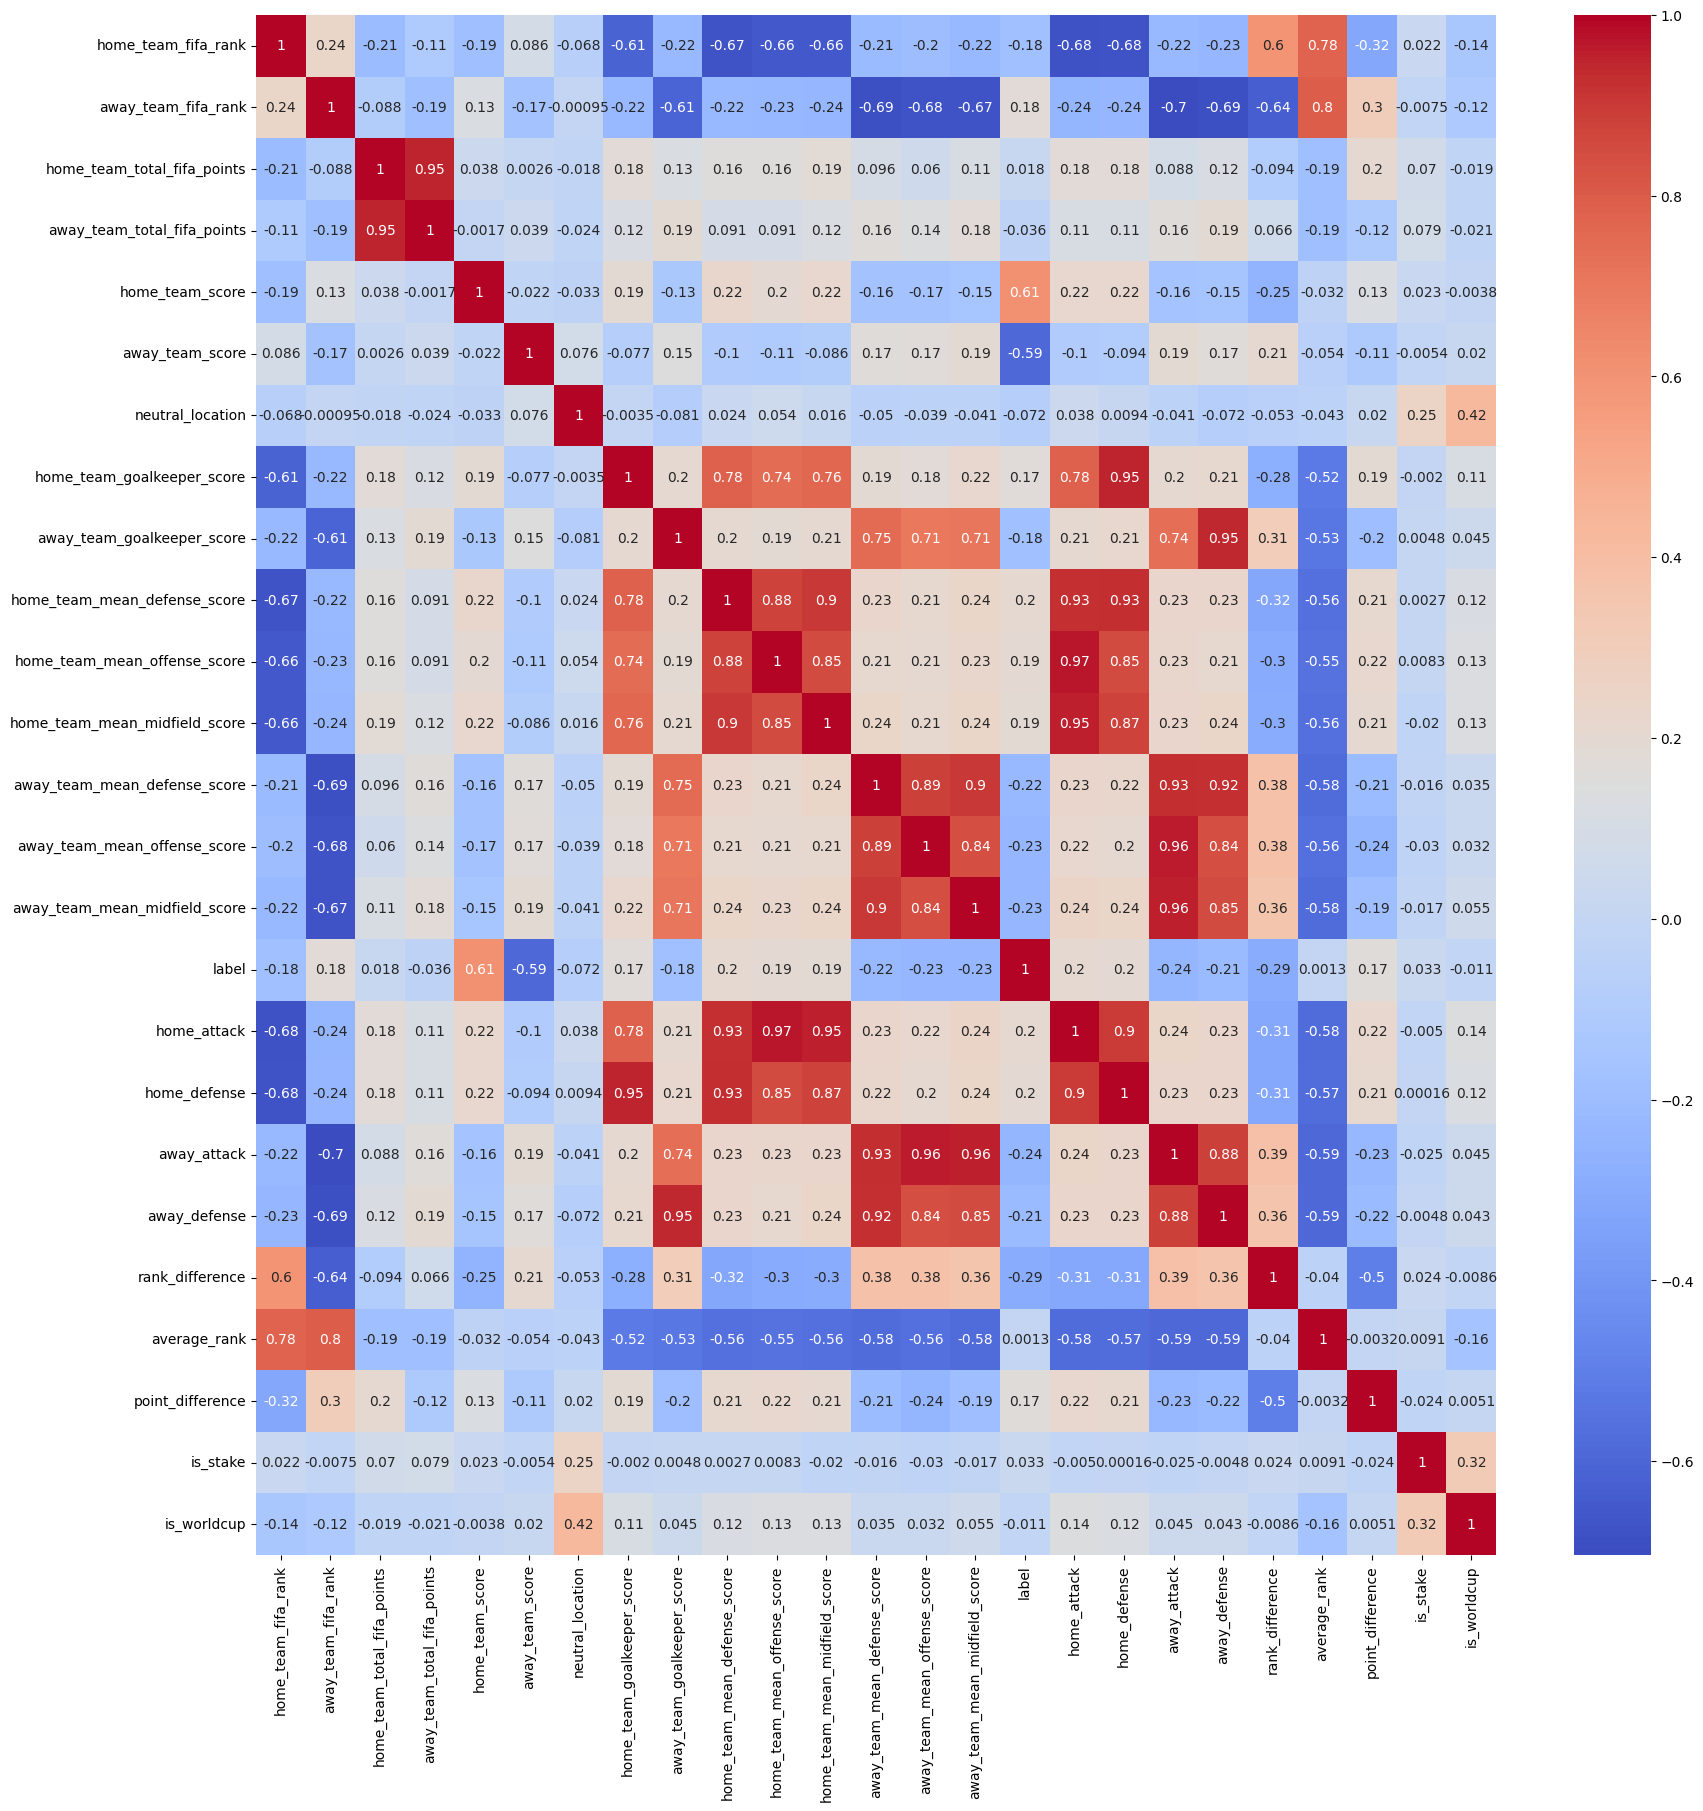

In [312]:
# Heatmap of corrrelation between the features and the label in fit_df
plt.figure(figsize=(20, 20))
sns.heatmap(final_fifa_df.corr(), annot=True, cmap='coolwarm')


eval_env: 1


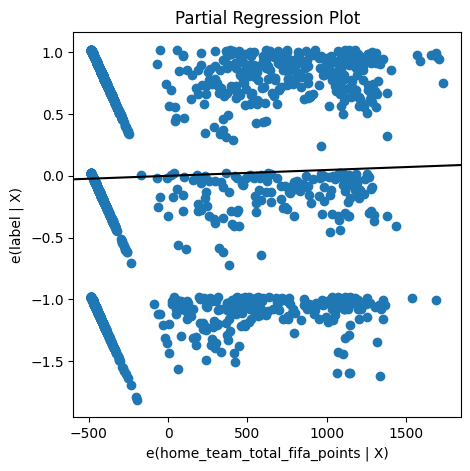

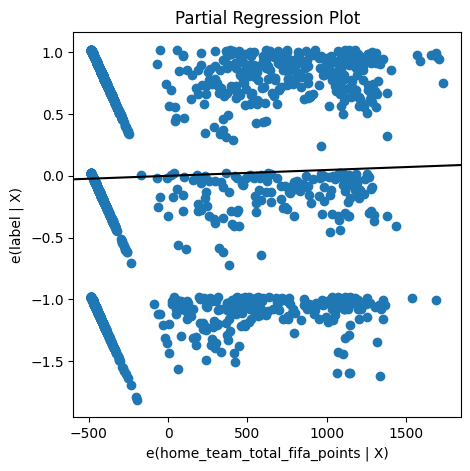

In [299]:
sm.graphics.plot_partregress('label', 'home_team_total_fifa_points', [
                             'away_team_fifa_rank'], data=fit_df, obs_labels=False)


In [216]:
# linear regression with sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))



Coefficients: 
 [ 3.46859543e-11 -9.70791120e-07  2.32885005e-05 -2.32885005e-05
  1.93525751e-14 -3.34298561e-14 -8.35637115e-13  1.21132271e-13
 -1.00239261e-13  1.03334008e-13  4.13002965e-14 -4.85412914e-07
  9.70756446e-07 -2.32885005e-05  8.69762700e-08 -1.52652683e-08
 -4.98490138e-14 -2.94461677e-09 -2.94358285e-09 -2.94390923e-09
 -2.94448392e-09 -2.94335245e-09 -2.94262037e-09 -2.94480079e-09
 -2.94273275e-09 -2.94381828e-09 -2.94416078e-09 -2.94467162e-09
 -2.94358807e-09 -2.94466745e-09 -2.94540076e-09 -2.94489860e-09
 -2.94455939e-09 -2.94328006e-09 -2.94402180e-09 -2.94469664e-09
 -2.94325833e-09 -2.94382063e-09 -2.94446480e-09 -2.94670292e-09
 -2.94344468e-09 -2.94397299e-09 -2.94108204e-09 -2.94369808e-09
 -2.94345871e-09 -2.94396840e-09 -4.35954002e-09 -4.35640758e-09
 -4.35852553e-09 -4.35832007e-09 -4.35610117e-09 -4.35304062e-09
 -4.35685533e-09 -4.35702376e-09 -4.35658822e-09 -4.35795737e-09
 -4.35891676e-09 -4.35931292e-09 -4.35611211e-09 -4.35457891e-09
 -4.35417

# XGBOOST

In [150]:
# Build xgboost regressor 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X, y = fit_df.drop(['label'], axis=1).copy(), fit_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))))
print("R2: %f" % (xgb_model.score(X_test, y_test)))

RMSE: 0.444971
R2: 0.207983


In [130]:
X_train

,average_rank,rank_difference,point_difference,is_stake,is_worldcup
22061,36.5,-55,255,1,0
9070,13.0,-16,0,1,0
19507,31.5,37,-454,1,0
22072,40.5,-25,87,0,0
21896,25.0,22,-119,1,0
...,...,...,...,...,...
15886,73.5,-107,642,1,0
9488,102.5,97,0,0,0
4142,91.0,32,0,0,0
4503,41.5,-15,0,0,0


In [115]:
X_train


,team1_fifa_rank,team2_fifa_rank,neutral_location,shoot_out,team1_goalkeeper_score,team2_goalkeeper_score,team1_mean_defense_score,team1_mean_offense_score,team1_mean_midfield_score,team2_mean_defense_score,team2_mean_offense_score,team2_mean_midfield_score,rank_difference,average_rank,point_difference,is_stake,is_worldcup,team1_Afghanistan,team1_Albania,team1_Algeria,team1_Andorra,team1_Angola,team1_Antigua and Barbuda,team1_Argentina,team1_Armenia,team1_Aruba,team1_Australia,team1_Austria,team1_Azerbaijan,team1_Bahrain,team1_Bangladesh,team1_Barbados,team1_Belarus,team1_Belgium,team1_Belize,team1_Benin,team1_Bermuda,team1_Bhutan,team1_Bolivia,team1_Bosnia and Herzegovina,team1_Botswana,team1_Brazil,team1_Bulgaria,team1_Burkina Faso,team1_Burundi,team1_Cabo Verde,team1_Cambodia,team1_Cameroon,team1_Canada,team1_Cayman Islands,...,team2_Yemen,team2_Zambia,team2_Zimbabwe,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_African Nations Championship qualification,tournament_Amílcar Cabral Cup,tournament_Arab Cup,tournament_CONCACAF Nations League,tournament_CONCACAF Nations League qualification,tournament_CONMEBOL–UEFA Cup of Champions,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa Confraternidad,tournament_Cup of Ancient Civilizations,tournament_Cyprus International Tournament,tournament_Dynasty Cup,tournament_EAFF Championship,tournament_FIFA World Cup,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup,tournament_Gold Cup qualification,tournament_Gulf Cup,tournament_King Hassan II Tournament,tournament_King's Cup,tournament_Kirin Challenge Cup,tournament_Kirin Cup,tournament_Korea Cup,tournament_Lunar New Year Cup,tournament_Malta International Tournament,tournament_Nations Cup,tournament_Nehru Cup,tournament_Nordic Championship,tournament_OSN Cup,tournament_Oceania Nations Cup,tournament_Simba Tournament,tournament_Superclásico de las Américas,tournament_Tournoi de France,tournament_UEFA Euro,tournament_UEFA Euro qualification,tournament_UEFA Nations League,tournament_UNCAF Cup,tournament_USA Cup,tournament_United Arab Emirates Friendship Tournament,tournament_WAFF Championship
4045,10,32,0,0,88.000000,82.0,85.000000,85.000000,84.000000,81.0,82.0,81.0,-22,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3913,20,7,0,0,76.000000,89.0,77.000000,75.000000,76.000000,85.0,86.0,87.0,13,13.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22726,18,21,1,0,78.000000,87.0,76.000000,79.000000,77.000000,77.0,83.0,78.0,-3,19.5,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21933,7,90,0,0,80.000000,71.0,80.000000,82.000000,86.000000,72.0,69.0,73.0,-83,48.5,357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7291,87,8,0,0,71.000000,83.0,68.000000,72.000000,69.000000,85.0,85.0,85.0,79,47.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 54.44%
[[ 288  745   34]
 [  59 1710   60]
 [  76  725   32]]
              precision    recall  f1-score   support

           0       0.68      0.27      0.39      1067
           1       0.54      0.93      0.68      1829
           2       0.25      0.04      0.07       833

    accuracy                           0.54      3729
   macro avg       0.49      0.41      0.38      3729
weighted avg       0.52      0.54      0.46      3729



/var/folders/sq/yc_kbm4x3nbbkk85gmp2_ylw0000gn/T/ipykernel_64614/2739412676.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 2000x2000 with 0 Axes>

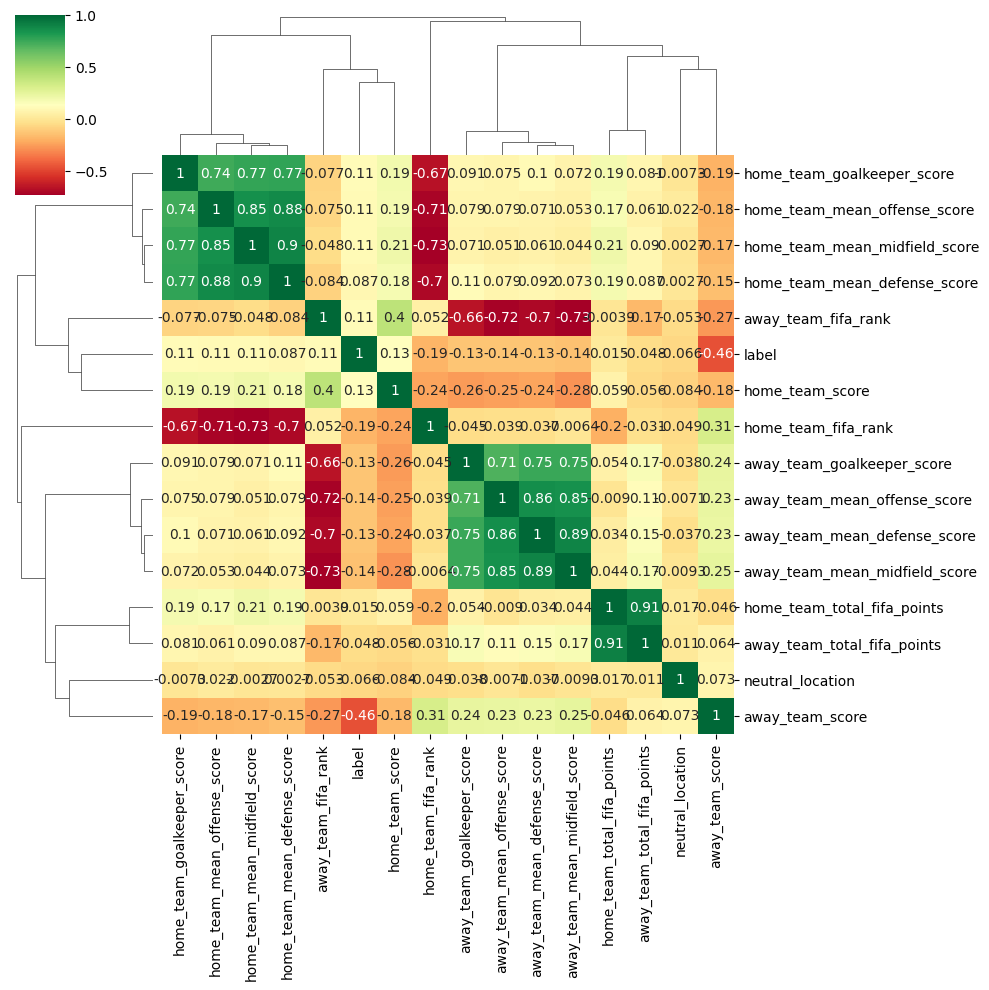

In [ ]:
# plot the correlation between the features and the target
import seaborn as sns
corrmat = final_fifa_df.corr().sort_values(by=['label'], ascending=False)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Build clustermap for the correlation between the features and the target with only the bottom of the heatmap
g = sns.clustermap(final_fifa_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


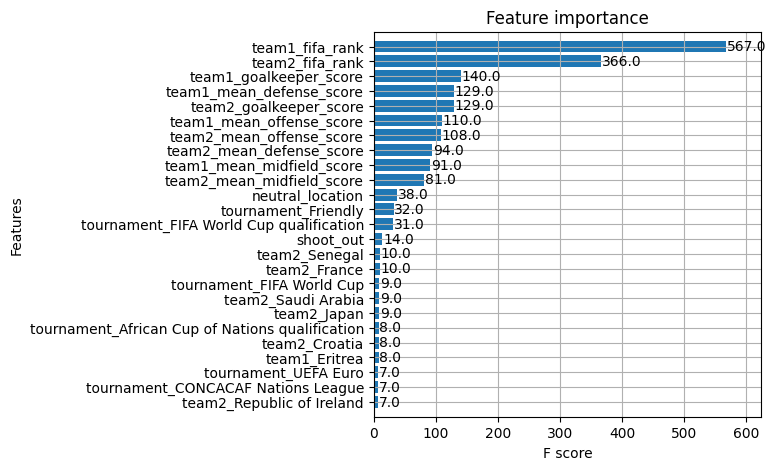

In [ ]:
# Plot feature importance of the highest 15 features
xgb.plot_importance(xgb_model, max_num_features=25, height=0.8)
plt.show()
